In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas_datareader import data
import os
import matplotlib.patches as mpatches
from mpl_toolkits import mplot3d
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.arima_model import ARMA
import statsmodels.api as sm

In [ ]:
# uploading data into the environment
cpi_df = pd.read_excel('/content/assignment 4 data.xlsx')
# Rename column name:
cpi_df.rename(columns = {'Mid Price':'CPI Index'}, inplace = True)
# Setting date column as index:
cpi_df.set_index("Date", inplace=True)
# looking at the uploaded data table
cpi_df.head(10)

,CPI Index
Date,
1970-03-31,0.13
1970-06-30,0.14
1970-09-30,0.14
1970-12-31,0.14
1971-03-31,0.15
1971-06-30,0.15
1971-09-30,0.15
1971-12-31,0.16
1972-03-31,0.16


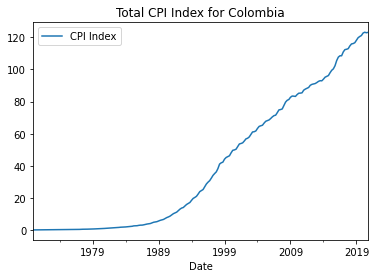

In [ ]:
cpi_df.plot(title="Total CPI Index for Colombia")


Text(0.5, 1.0, 'Colombian Total CPI Index')

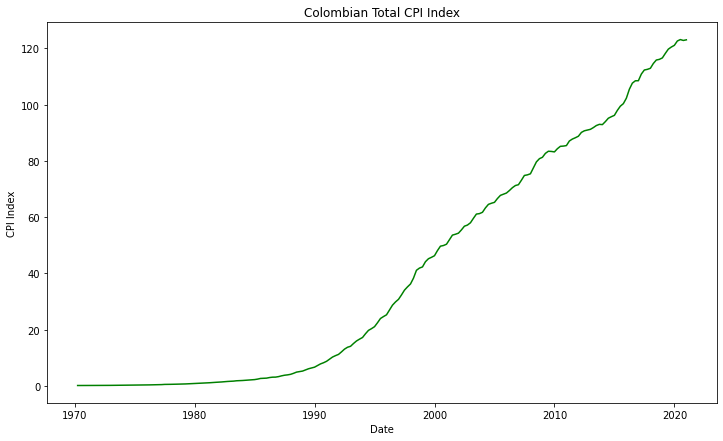

In [ ]:
#Plotting GLD px:
fig, ax1 = plt.subplots()
fig.set_size_inches(12, 7)
ax1.set_xlabel("Date")
ax1.set_ylabel("CPI Index")
color_1="green"
ax1.plot(cpi_df.index, cpi_df['CPI Index'], color = color_1)
ax1.set_title("Colombian Total CPI Index")

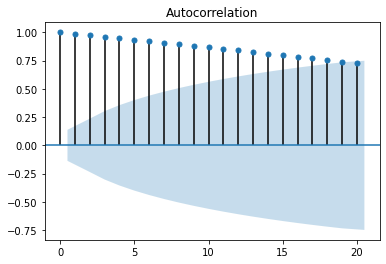

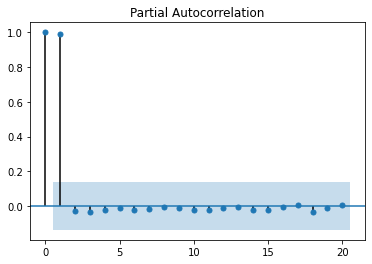

In [ ]:
sm.graphics.tsa.plot_acf(cpi_df['CPI Index'], lags=20)
sm.graphics.tsa.plot_pacf(cpi_df['CPI Index'], lags=20)
plt.show()

In [ ]:
sm.tsa.stattools.adfuller(cpi_df['CPI Index'], maxlag=5, regression='c', autolag='AIC', store=False, regresults=False)

(0.8358963018368664,
 0.9921940520323369,
 5,
 198,
 {'1%': -3.4638151713286316,
  '10%': -2.574611347821651,
  '5%': -2.876250632135043},
 125.19193479535352)

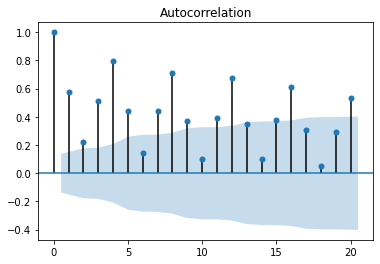

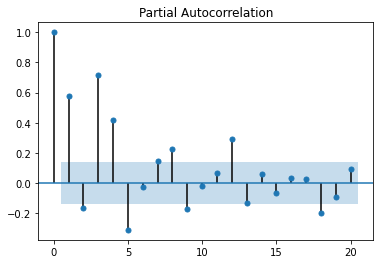

In [ ]:
# Calculate the first difference:
cpi_index_firstDiff = cpi_df["CPI Index"].diff()[1:]# taking index at 1 to avoid NaN value after differencing
# Plot the ACF and PACF:
sm.graphics.tsa.plot_acf(cpi_index_firstDiff, lags=20)
sm.graphics.tsa.plot_pacf(cpi_index_firstDiff, lags=20)
plt.show()

In [ ]:
sm.tsa.stattools.adfuller(cpi_index_firstDiff, maxlag=5, regression='c', autolag='AIC', store=False, regresults=False)

(-2.444076844393344,
 0.1296803944125367,
 4,
 198,
 {'1%': -3.4638151713286316,
  '10%': -2.574611347821651,
  '5%': -2.876250632135043},
 124.30126536552461)

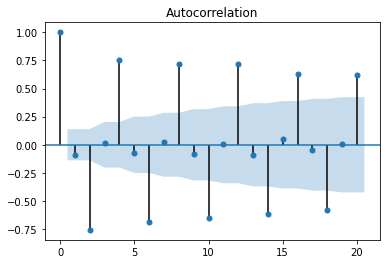

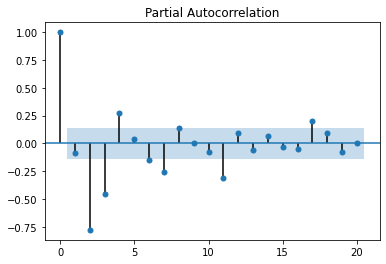

In [ ]:
# Calculate the second difference:
cpi_index_secondDiff = cpi_index_firstDiff.diff()[1:]# taking index at 1 to avoid NaN value after differencing
# Plot the ACF and PACF:
sm.graphics.tsa.plot_acf(cpi_index_secondDiff, lags=20)
sm.graphics.tsa.plot_pacf(cpi_index_secondDiff, lags=20)
plt.show()

In [ ]:
sm.tsa.stattools.adfuller(cpi_index_secondDiff, maxlag=5, regression='c', autolag='AIC', store=False, regresults=False)

(-7.346718647284611,
 1.0310095168170925e-10,
 5,
 196,
 {'1%': -3.464161278384219,
  '10%': -2.5746921001665974,
  '5%': -2.876401960790147},
 127.55861839574959)

In [ ]:
# statsmodels.tsa.arima_model
#define model: 
model_gld_oct = ARMA(gld_oct_firstD_df, order=(1,1))
#fitting the model
model_gld_oct_fit = model_gld_oct.fit()
#summary of the model
print(model_gld_oct_fit.summary())

In [ ]:
arma_cpi_model_1 = sm.tsa.ARMA(cpi_index_secondDiff, order=(4,0))
arma_cpi_model_1_fit = arma_cpi_model_1.fit()
print(arma_cpi_model_1_fit.summary())


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  % freq, ValueWarning)


                              ARMA Model Results                              
Dep. Variable:              CPI Index   No. Observations:                  202
Model:                     ARMA(4, 0)   Log Likelihood                 -59.648
Method:                       css-mle   S.D. of innovations              0.323
Date:                Mon, 05 Apr 2021   AIC                            131.295
Time:                        06:14:34   BIC                            151.145
Sample:                    09-30-1970   HQIC                           139.326
                         - 12-31-2020                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0018      0.011      0.154      0.878      -0.021       0.024
ar.L1.CPI Index    -0.3747      0.068     -5.544      0.000      -0.507      -0.242
ar.L2.CPI Index    -0.6051      